In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
import matplotlib.gridspec as gridspec
from scipy import interpolate
#%matplotlib inline

load Data

In [2]:
wannier_xlat = np.loadtxt('../../Data/Wanner_3D_x.txt', delimiter = ',')
wannier_ylat = np.loadtxt('../../Data/Wanner_3D_y.txt', delimiter = ',')
wannier_lat = np.loadtxt('../../Data/Wanner_3D_rho.txt', delimiter = ',')

In [3]:
hartree = np.loadtxt('../../Data/mytable_Hartree.txt', delimiter = ',', skiprows = 2)
hartree_fock = np.loadtxt('../../Data/mytable_HartreeFock.txt', delimiter = ',', skiprows = 2)

In [4]:
pimc_1 = np.loadtxt('../../Data/PIMC_planedensity_1fill.txt', delimiter = ',', skiprows = 2)
pimc_0 = np.loadtxt('../../Data/PIMC_planedensity_0fill.txt', delimiter = ',', skiprows = 2)

In [5]:
#pimc_0_arr = np.loadtxt("ce-planedensity-00.500-0001-00.002-0.00313-0a358fbf-1a7c-4f10-98c1-c53a520bb8df.dat")

Creates density cut for 0 filling PIMC averaging over Monte-Carlo steps.

In [6]:
pimc_avg_0_arr = np.loadtxt('pimc_site_average.txt',delimiter = ',')

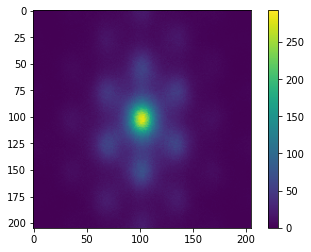

In [7]:
plt.imshow(pimc_avg_0_arr)
#plt.imshow(np.log(pimc_avg_0_arr))
plt.colorbar()

In [8]:
period = np.sqrt(3)*1.42
pimc_x = np.linspace(-period/2, period/2, 51)
extended_pimc_x = np.linspace(-2*period, 2*period, 205)
extended_pimc_y = np.linspace(-1.5*np.sqrt(3)*period, 1.5*np.sqrt(3)*period, 205)

X, Y = np.meshgrid(extended_pimc_x, extended_pimc_y)
pimc_z = np.transpose(pimc_avg_0_arr)

f = interpolate.interp2d(extended_pimc_x, extended_pimc_y, pimc_z, kind='cubic')

extended_x_left = np.linspace(-period, period, 205)
extended_y_left = np.linspace(-np.sqrt(3)*period, np.sqrt(3)*period, 205)
extended_x_right = np.linspace(-period, period, 205)
extended_y_right = np.flip(np.linspace(-np.sqrt(3)*period, np.sqrt(3)*period, 205))

pimc_avg_left = [f(extended_x_left[i], extended_y_left[i]) for i in range(len(extended_x_left))]
pimc_avg_right = [f(extended_x_right[i], extended_y_right[i]) for i in range(len(extended_x_right))]

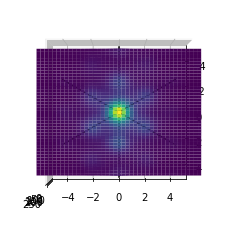

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.transpose(pimc_avg_0_arr), cmap=plt.get_cmap("viridis"))
ax.plot(extended_x_left, extended_y_left, 100, color = 'black')
ax.plot(extended_x_right, extended_y_right, 100, color = 'black')
ax.plot(extended_pimc_x, extended_pimc_x*0, 100, color = 'black')
ax.set_aspect('auto')
ax.view_init(azim=0, elev=90)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

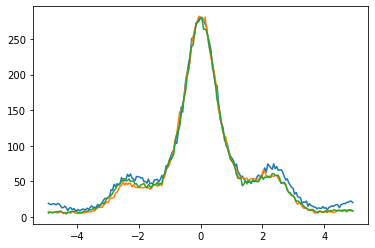

In [10]:
plt.plot(extended_pimc_x,  pimc_avg_0_arr[:,102])
plt.plot(extended_pimc_x,  pimc_avg_left)
plt.plot(extended_pimc_x,  pimc_avg_right)

In [11]:
pimc_cut_avg = pimc_avg_0_arr[:,102] + np.squeeze(pimc_avg_left) + np.squeeze(pimc_avg_right)

Creates cuts from average density data:

In [12]:
PIMC_0_grid = np.reshape(pimc_0, (205, 205))
PIMC_1_grid = np.reshape(pimc_1, (205, 205))

Averaging over all sites of y slices for 0 filling PIM

In [13]:
y_slices = np.zeros((205, 75))

for i in range(6):
    y_ind = int(np.ceil(i*205/6))
    y_slices[:, i] = PIMC_0_grid[:, y_ind]
    
y_slices[:, 7] = PIMC_0_grid[:, -1]

even_sum = np.zeros(205)
odd_sum = np.zeros(205)

for i in range(7):
    if i%2 == 0:
        even_sum += y_slices[:, i]
    else:
        odd_sum += y_slices[:, i]
    
x_length = 205/8

left_lim = int(np.floor(x_length))
right_lim = len(even_sum)-int(np.floor(7*x_length))

even_combine = np.zeros(left_lim + right_lim)
even_combine_check = np.zeros((4, left_lim + right_lim))

for i in range(4):
    for j in range(-left_lim, right_lim):
        even_combine[j + left_lim] += even_sum[int(np.floor((2*i+1)*x_length)) + j]
        even_combine_check[i, j + left_lim] += even_sum[int(np.floor((2*i+1)*x_length)) + j]
        
odd_sum_extended = np.concatenate((np.zeros(left_lim+1), odd_sum, np.zeros(right_lim-1)))

odd_combine = np.zeros(left_lim + right_lim)
odd_combine_check = np.zeros((5, left_lim + right_lim))

for i in range(5):
    for j in range(-left_lim, right_lim):
        odd_combine[j + left_lim] += odd_sum_extended[int(np.floor((2*i+1)*x_length)) + j]
        odd_combine_check[i, j + left_lim] += odd_sum_extended[int(np.floor((2*i+1)*x_length)) + j]
        
PIMC_0_ave = odd_combine + even_combine

Averageing over all sites of y slices for 1 filling PIM

In [14]:
y_slices = np.zeros((205, 75))

for i in range(6):
    y_ind = int(np.ceil(i*205/6))
    y_slices[:, i] = PIMC_1_grid[:, y_ind]
    
y_slices[:, 7] = PIMC_1_grid[:, -1]

even_sum = np.zeros(205)
odd_sum = np.zeros(205)

for i in range(7):
    if i%2 == 0:
        even_sum += y_slices[:, i]
    else:
        odd_sum += y_slices[:, i]
    
x_length = 205/8

left_lim = int(np.floor(x_length))
right_lim = len(even_sum)-int(np.floor(7*x_length))

even_combine = np.zeros(left_lim + right_lim)
even_combine_check = np.zeros((4, left_lim + right_lim))

for i in range(4):
    for j in range(-left_lim, right_lim):
        even_combine[j + left_lim] += even_sum[int(np.floor((2*i+1)*x_length)) + j]
        even_combine_check[i, j + left_lim] += even_sum[int(np.floor((2*i+1)*x_length)) + j]
        
odd_sum_extended = np.concatenate((np.zeros(left_lim+1), odd_sum, np.zeros(right_lim-1)))

odd_combine = np.zeros(left_lim + right_lim)
odd_combine_check = np.zeros((5, left_lim + right_lim))

for i in range(5):
    for j in range(-left_lim, right_lim):
        odd_combine[j + left_lim] += odd_sum_extended[int(np.floor((2*i+1)*x_length)) + j]
        odd_combine_check[i, j + left_lim] += odd_sum_extended[int(np.floor((2*i+1)*x_length)) + j]
        
PIMC_1_ave = odd_combine + even_combine

In [15]:
period = np.sqrt(3)*1.42
pimc_x = np.linspace(-period/2, period/2, 51)
extended_pimc_x = np.linspace(-2*period, 2*period, 205)
wannier_x = wannier_ylat[289,:]
hartree_x = hartree[:,0]
hartree_fock_x = hartree_fock[:,0]

Renormalize all densities so $$ \sum \rho = 1 $$

In [16]:
pimc_0_ave = PIMC_0_ave/sum(PIMC_0_ave)
pimc_1_ave = PIMC_1_ave/sum(PIMC_1_ave)
pimc_bin = pimc_cut_avg/sum(pimc_cut_avg)
wannier_dens = wannier_lat[289,:]/sum(wannier_lat[289,:])
hartree_dens = (10**(hartree[:,1]))**2
hartree_dens = hartree_dens/sum(hartree_dens)
hartree_fock_dens = (10**(hartree_fock[:,1]))**2
hartree_fock_dens = hartree_fock_dens/sum(hartree_fock_dens)

plotting

In [17]:
plt.style.use('../aps1.mplstyle')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


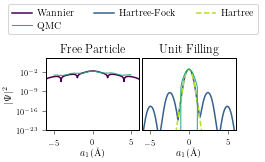

In [18]:
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True) 
ax[0].semilogy(wannier_x, wannier_dens, label = "Wannier", color = colors[0])
#ax[0].semilogy(pimc_x, pimc_0_ave, color = colors[2])
ax[0].semilogy(extended_pimc_x, pimc_bin, label = "QMC", color = colors[2], linewidth=1)
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(10e-24, 10e2)
ax[0].set_title("Free Particle")
ax[0].set_xlabel(r'$a_1$(\AA)')
ax[0].set_ylabel(r'$|\Psi|^2$')
ax[0].tick_params(direction="out", top = False, bottom=True, left=True, right=False, length=4)


ax[1].set_yticks([])
ax[1].semilogy(hartree_fock_x, hartree_fock_dens, label = "Hartree-Fock", color = colors[1])
ax[1].semilogy(hartree_x, hartree_dens, label = "Hartree", linestyle = '--', color = colors[3])
ax[1].semilogy(pimc_x, pimc_1_ave, color = colors[2], linewidth=1)
ax[1].set_title("Unit Filling")
ax[1].set_xlabel(r'$a_1$(\AA)')
ax[1].tick_params(direction="out", top = False, bottom=True, left=False, right=False, length=4)


fig.subplots_adjust(wspace=0.03, top=0.6)

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3)


#plt.legend()
#plt.show()

plt.savefig('WannierCut.pdf', transparent=False) 
plt.savefig('WannierCut.svg', transparent=False) 

In [19]:
wannier_cut_out = np.zeros((len(wannier_x), 10))
wannier_cut_out[:,0] = wannier_x
wannier_cut_out[:,1] = wannier_dens
wannier_cut_out[:len(pimc_bin),2] = extended_pimc_x
wannier_cut_out[:len(pimc_bin),3] = pimc_bin
wannier_cut_out[:len(hartree_fock_x),4] = hartree_fock_x
wannier_cut_out[:len(hartree_fock_x),5] = hartree_fock_dens
wannier_cut_out[:len(hartree_x),6] = hartree_x
wannier_cut_out[:len(hartree_x),7] = hartree_dens
wannier_cut_out[:len(pimc_x),8] = pimc_x
wannier_cut_out[:len(pimc_x),9] = pimc_1_ave


In [20]:
np.savetxt("Wanier_cut.txt",wannier_cut_out)